## 1. Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 2. Load Data

In [16]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print("Training data shape:", train_df.shape)
print("Test data shape:", test_df.shape)

Training data shape: (891, 12)
Test data shape: (418, 11)


## 3. Data Wrangling and Initial Exploration

In [17]:
print("Training Data Info:")
print(train_df.info())
print("\n" + "="*50 + "\n")

print("First 5 rows:")
display(train_df.head())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
print("\nMissing values:")
missing_data = train_df.isnull().sum()
missing_percent = (missing_data / len(train_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_data,
    'Percentage': missing_percent
})
display(missing_df[missing_df['Missing Count'] > 0])


Missing values:


,Missing Count,Percentage
Age,177,19.865320
Cabin,687,77.104377
Embarked,2,0.224467


## 4. Data Cleaning

In [19]:
df_clean = train_df.copy()

df_clean.loc[:, 'Age'] = df_clean['Age'].fillna(df_clean['Age'].median())
df_clean.loc[:, 'Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])
df_clean.loc[:, 'Has_Cabin'] = df_clean['Cabin'].notna().astype(int)

test_df.loc[:, 'Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())

for dataset in [df_clean, test_df]:
    dataset.loc[:, 'FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset.loc[:, 'IsAlone'] = (dataset['FamilySize'] == 1).astype(int)
    dataset.loc[:, 'Title'] = dataset['Name'].str.extract(r' ([A-Za-z]+)\.')

title_mapping = {
    'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
    'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
    'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
    'Jonkheer': 'Rare', 'Don': 'Rare', 'Mme': 'Mrs', 'Capt': 'Rare',
    'Sir': 'Rare', 'Dona': 'Rare'
}

df_clean.loc[:, 'Title'] = df_clean['Title'].map(title_mapping)
test_df.loc[:, 'Title'] = test_df['Title'].map(title_mapping)

for dataset in [df_clean, test_df]:
    dataset.loc[:, 'AgeBin'] = pd.cut(dataset['Age'], bins=[0, 12, 20, 40, 60, 80], 
                                      labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])
    dataset.loc[:, 'FareBin'] = pd.qcut(dataset['Fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print("Data cleaning completed!")
print("Missing values after cleaning:", df_clean.isnull().sum().sum())


Data cleaning completed!
Missing values after cleaning: 687


## 5. Exploratory Data Analysis (EDA)

In [20]:
print("Dataset Overview:")
display(df_clean.describe())

Dataset Overview:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin,FamilySize,IsAlone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.228956,1.904602,0.602694
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.420397,1.613459,0.489615
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,1.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000,2.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,11.000000,1.000000


In [21]:
survival_rate = df_clean['Survived'].mean()
print(f"Overall survival rate: {survival_rate:.2%}")

print("\nSurvival count:")
print(df_clean['Survived'].value_counts())

Overall survival rate: 38.38%

Survival count:
Survived
0    549
1    342
Name: count, dtype: int64


## 6. Univariate Analysis

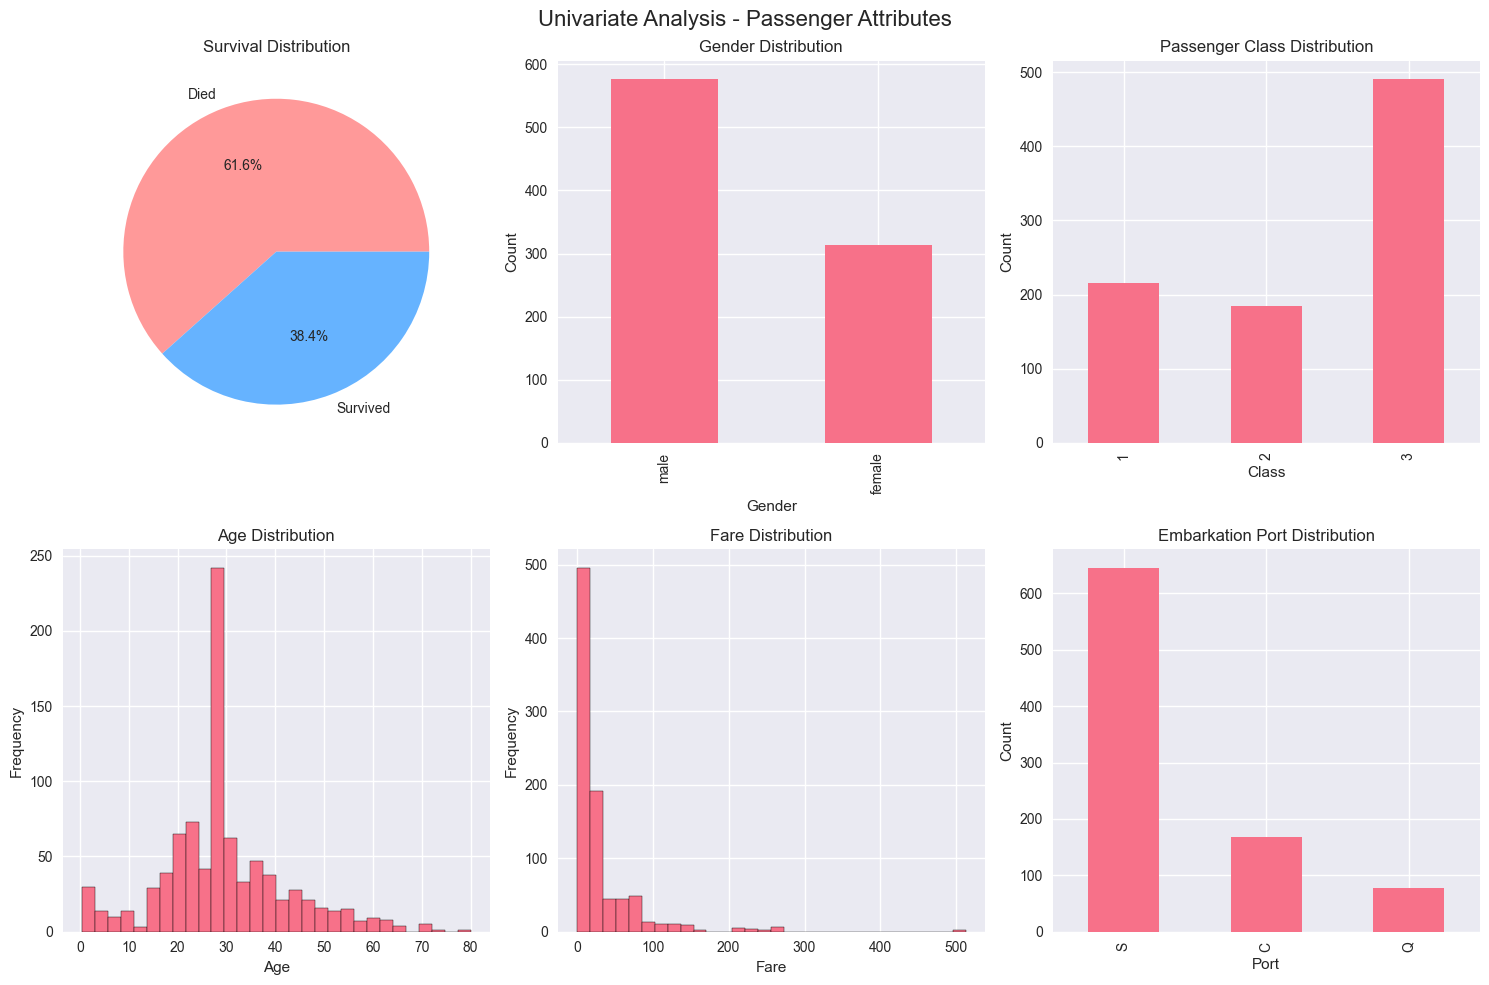

In [22]:
# Survival distribution
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Univariate Analysis - Passenger Attributes', fontsize=16)

# Survival count
axes[0,0].pie(df_clean['Survived'].value_counts(), labels=['Died', 'Survived'], 
              autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
axes[0,0].set_title('Survival Distribution')

# Gender distribution
df_clean['Sex'].value_counts().plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Gender Distribution')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Count')

# Passenger class distribution
df_clean['Pclass'].value_counts().sort_index().plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Passenger Class Distribution')
axes[0,2].set_xlabel('Class')
axes[0,2].set_ylabel('Count')

# Age distribution
axes[1,0].hist(df_clean['Age'], bins=30, edgecolor='black')
axes[1,0].set_title('Age Distribution')
axes[1,0].set_xlabel('Age')
axes[1,0].set_ylabel('Frequency')

# Fare distribution
axes[1,1].hist(df_clean['Fare'], bins=30, edgecolor='black')
axes[1,1].set_title('Fare Distribution')
axes[1,1].set_xlabel('Fare')
axes[1,1].set_ylabel('Frequency')

# Embarked distribution
df_clean['Embarked'].value_counts().plot(kind='bar', ax=axes[1,2])
axes[1,2].set_title('Embarkation Port Distribution')
axes[1,2].set_xlabel('Port')
axes[1,2].set_ylabel('Count')

plt.tight_layout()
plt.show()

## 7. Bivariate Analysis

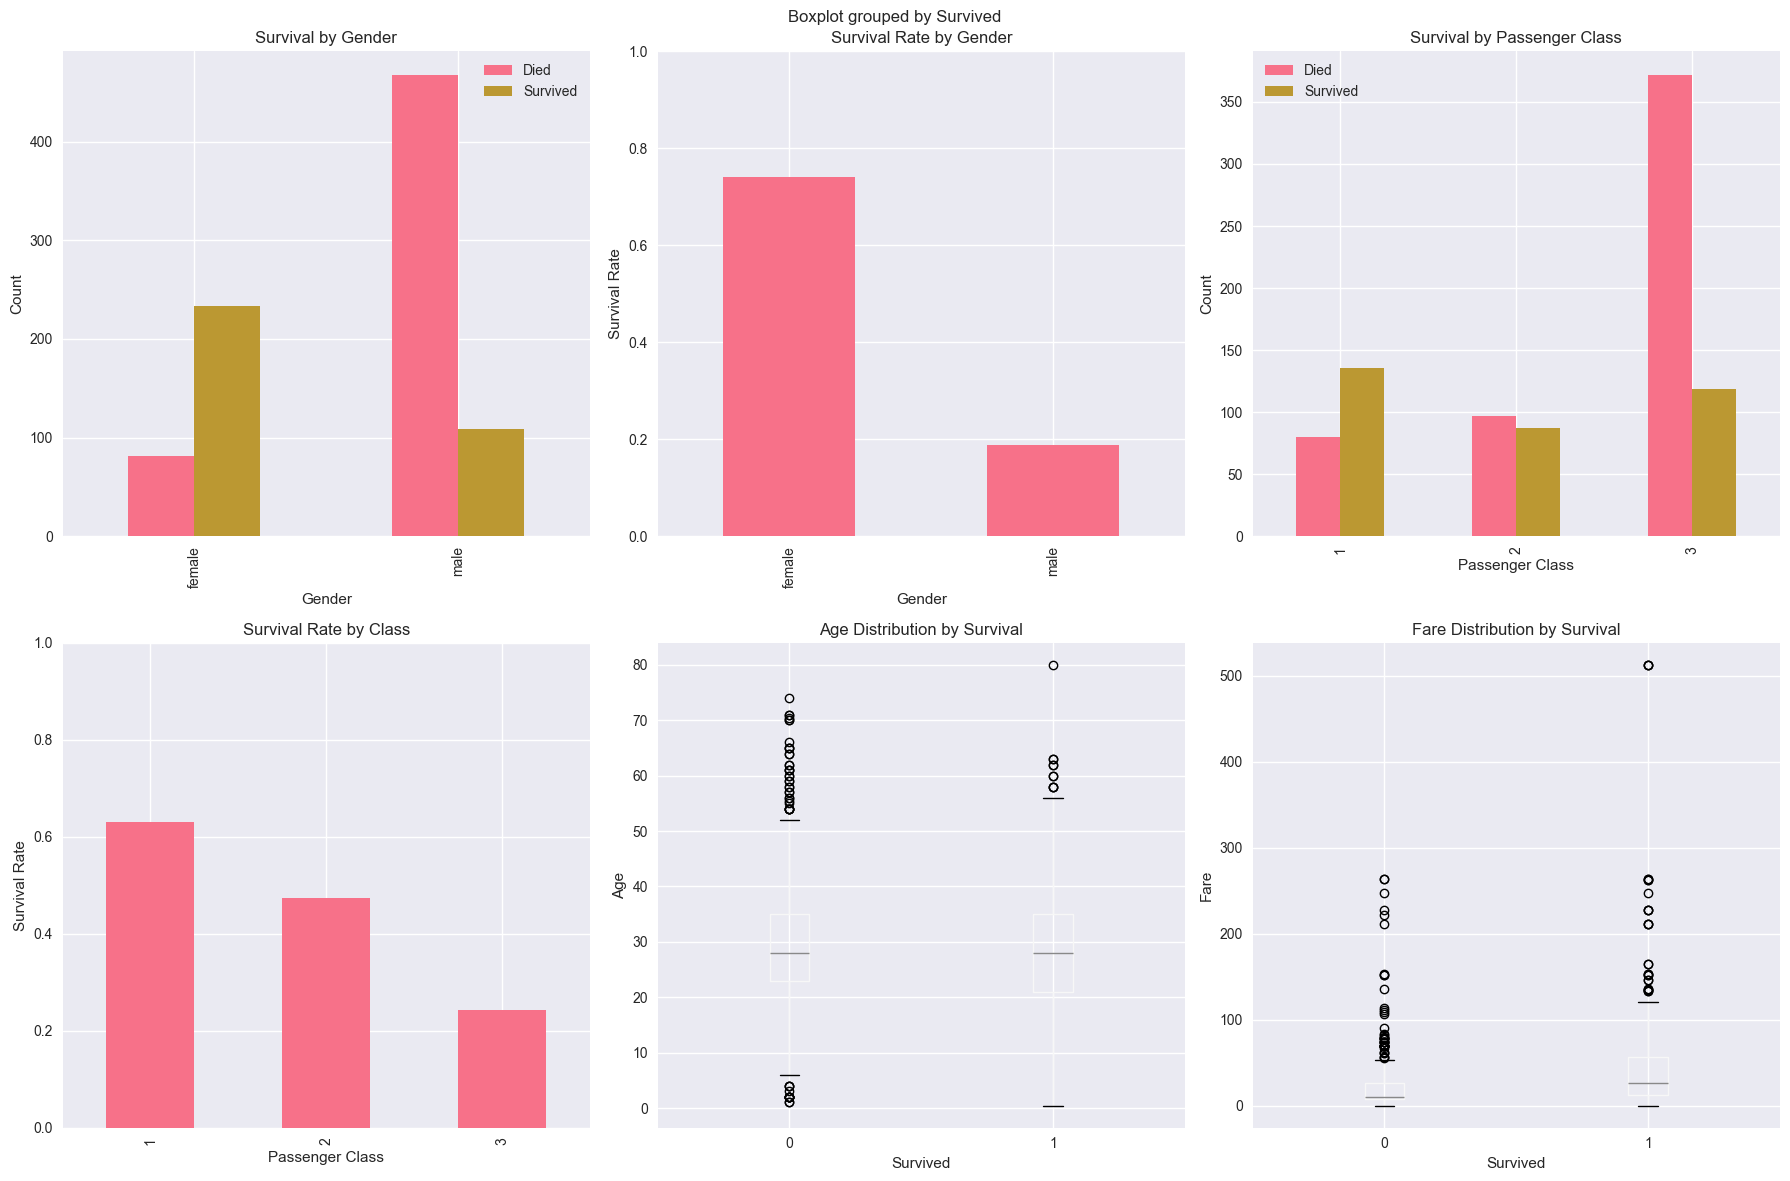

In [23]:
# Survival by Gender
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bivariate Analysis - Survival by Different Attributes', fontsize=16)

# Survival by Gender
gender_survival = pd.crosstab(df_clean['Sex'], df_clean['Survived'])
gender_survival.plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Survival by Gender')
axes[0,0].set_xlabel('Gender')
axes[0,0].set_ylabel('Count')
axes[0,0].legend(['Died', 'Survived'])

# Survival rate by Gender
gender_rate = df_clean.groupby('Sex')['Survived'].mean()
gender_rate.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Survival Rate by Gender')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Survival Rate')
axes[0,1].set_ylim(0, 1)

# Survival by Class
class_survival = pd.crosstab(df_clean['Pclass'], df_clean['Survived'])
class_survival.plot(kind='bar', ax=axes[0,2])
axes[0,2].set_title('Survival by Passenger Class')
axes[0,2].set_xlabel('Passenger Class')
axes[0,2].set_ylabel('Count')
axes[0,2].legend(['Died', 'Survived'])

# Survival rate by Class
class_rate = df_clean.groupby('Pclass')['Survived'].mean()
class_rate.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Survival Rate by Class')
axes[1,0].set_xlabel('Passenger Class')
axes[1,0].set_ylabel('Survival Rate')
axes[1,0].set_ylim(0, 1)

# Age vs Survival
df_clean.boxplot(column='Age', by='Survived', ax=axes[1,1])
axes[1,1].set_title('Age Distribution by Survival')
axes[1,1].set_xlabel('Survived')
axes[1,1].set_ylabel('Age')

# Fare vs Survival
df_clean.boxplot(column='Fare', by='Survived', ax=axes[1,2])
axes[1,2].set_title('Fare Distribution by Survival')
axes[1,2].set_xlabel('Survived')
axes[1,2].set_ylabel('Fare')

plt.tight_layout()
plt.show()

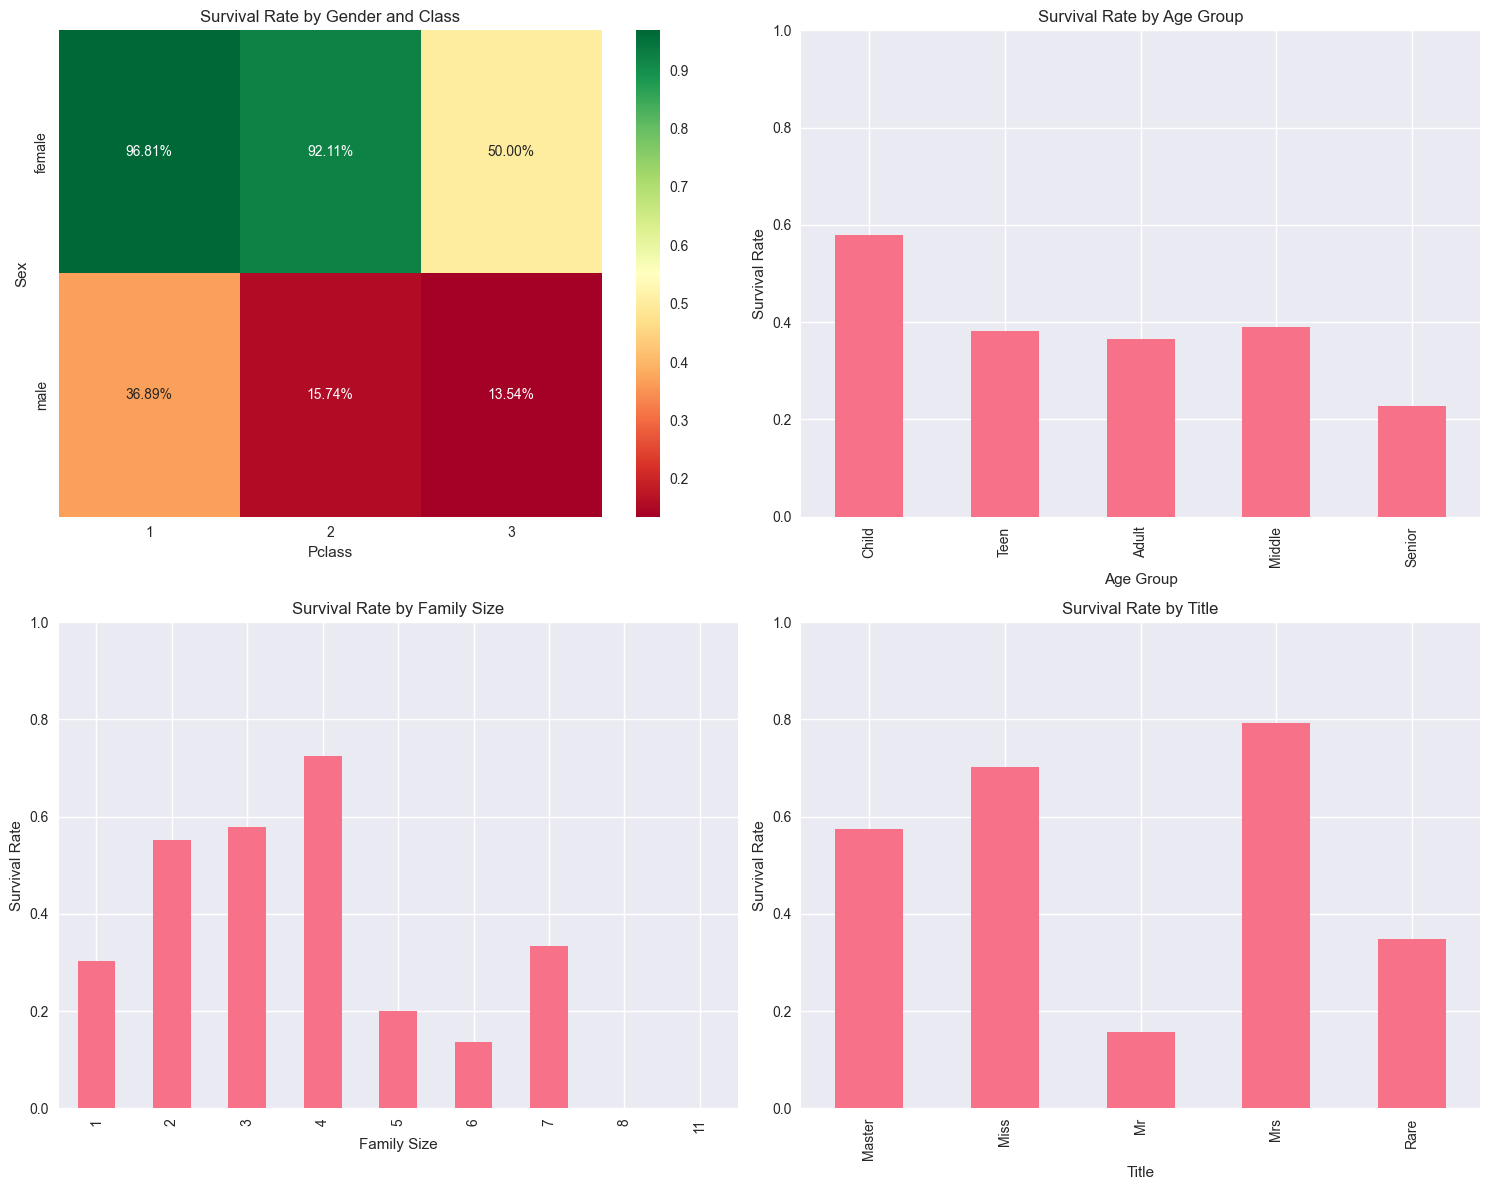

In [24]:
# Survival by multiple factors
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Survival by Gender and Class
survival_pivot = df_clean.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc='mean')
sns.heatmap(survival_pivot, annot=True, fmt='.2%', cmap='RdYlGn', ax=axes[0,0])
axes[0,0].set_title('Survival Rate by Gender and Class')

# Survival by Age groups
age_survival = df_clean.groupby('AgeBin', observed=True)['Survived'].mean()
age_survival.plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Survival Rate by Age Group')
axes[0,1].set_xlabel('Age Group')
axes[0,1].set_ylabel('Survival Rate')
axes[0,1].set_ylim(0, 1)

# Survival by Family Size
family_survival = df_clean.groupby('FamilySize')['Survived'].mean()
family_survival.plot(kind='bar', ax=axes[1,0])
axes[1,0].set_title('Survival Rate by Family Size')
axes[1,0].set_xlabel('Family Size')
axes[1,0].set_ylabel('Survival Rate')
axes[1,0].set_ylim(0, 1)

# Survival by Title
title_survival = df_clean.groupby('Title')['Survived'].mean()
title_survival.plot(kind='bar', ax=axes[1,1])
axes[1,1].set_title('Survival Rate by Title')
axes[1,1].set_xlabel('Title')
axes[1,1].set_ylabel('Survival Rate')
axes[1,1].set_ylim(0, 1)

plt.tight_layout()
plt.show()

## 8. Statistical Analysis

In [25]:
# Chi-square test for categorical variables
from scipy.stats import chi2_contingency

# Gender vs Survival
gender_table = pd.crosstab(df_clean['Sex'], df_clean['Survived'])
chi2, p_val, dof, expected = chi2_contingency(gender_table)
print(f"Gender vs Survival - Chi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print("Significant relationship" if p_val < 0.05 else "No significant relationship")

# Class vs Survival
class_table = pd.crosstab(df_clean['Pclass'], df_clean['Survived'])
chi2, p_val, dof, expected = chi2_contingency(class_table)
print(f"\nClass vs Survival - Chi-square test:")
print(f"Chi-square statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")
print("Significant relationship" if p_val < 0.05 else "No significant relationship")

# 7.2 T-test for continuous variables
from scipy.stats import ttest_ind

# Age vs Survival
survived_age = df_clean[df_clean['Survived'] == 1]['Age']
died_age = df_clean[df_clean['Survived'] == 0]['Age']
t_stat, p_val = ttest_ind(survived_age, died_age)
print(f"\nAge vs Survival - T-test:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")
print("Significant difference" if p_val < 0.05 else "No significant difference")

# Fare vs Survival
survived_fare = df_clean[df_clean['Survived'] == 1]['Fare']
died_fare = df_clean[df_clean['Survived'] == 0]['Fare']
t_stat, p_val = ttest_ind(survived_fare, died_fare)
print(f"\nFare vs Survival - T-test:")
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_val:.4f}")
print("Significant difference" if p_val < 0.05 else "No significant difference")

Gender vs Survival - Chi-square test:
Chi-square statistic: 260.72
P-value: 0.0000
Significant relationship

Class vs Survival - Chi-square test:
Chi-square statistic: 102.89
P-value: 0.0000
Significant relationship

Age vs Survival - T-test:
T-statistic: -1.94
P-value: 0.0528
No significant difference

Fare vs Survival - T-test:
T-statistic: 7.94
P-value: 0.0000
Significant difference


## 9. Key Insights and Summary

In [26]:
summary_stats = pd.DataFrame({
    'Feature': ['Gender', 'Class', 'Age', 'Fare', 'Family Size', 'Embarked', 'Title'],
    'Insight': [
        'Females had much higher survival rate (74%) than males (19%)',
        'Higher class had better survival rates (1st: 63%, 2nd: 47%, 3rd: 24%)',
        'Children had better survival rates, elderly had lower',
        'Higher fares correlated with better survival',
        'Small families (2-4 members) had better survival',
        'Cherbourg passengers had highest survival rate',
        'Women and children titles (Miss, Mrs, Master) had highest survival'
    ]
})

display(summary_stats)

,Feature,Insight
0,Gender,Females had much higher survival rate (74%) th...
1,Class,Higher class had better survival rates (1st: 6...
2,Age,"Children had better survival rates, elderly ha..."
3,Fare,Higher fares correlated with better survival
4,Family Size,Small families (2-4 members) had better survival
5,Embarked,Cherbourg passengers had highest survival rate
6,Title,"Women and children titles (Miss, Mrs, Master) ..."
